# Decision Trees
This notebook demonstrates Decision Tree classification on a real-world dataset (Breast Cancer Wisconsin dataset from sklearn).

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## Load and Prepare the Data

In [3]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

# variable information 
pd.set_option('display.max_rows', 13)
pd.set_option('display.width', 1000)
print(wine_quality.variables) 

                    name     role         type demographic             description units missing_values
0          fixed_acidity  Feature   Continuous        None                    None  None             no
1       volatile_acidity  Feature   Continuous        None                    None  None             no
2            citric_acid  Feature   Continuous        None                    None  None             no
3         residual_sugar  Feature   Continuous        None                    None  None             no
4              chlorides  Feature   Continuous        None                    None  None             no
5    free_sulfur_dioxide  Feature   Continuous        None                    None  None             no
6   total_sulfur_dioxide  Feature   Continuous        None                    None  None             no
7                density  Feature   Continuous        None                    None  None             no
8                     pH  Feature   Continuous        None      

Even though the quality description says it ranges from 0 to 10, but it only contains data from 3 to 9


In [4]:
# unique values of the target variable
print(np.unique(y)) 

[3 4 5 6 7 8 9]


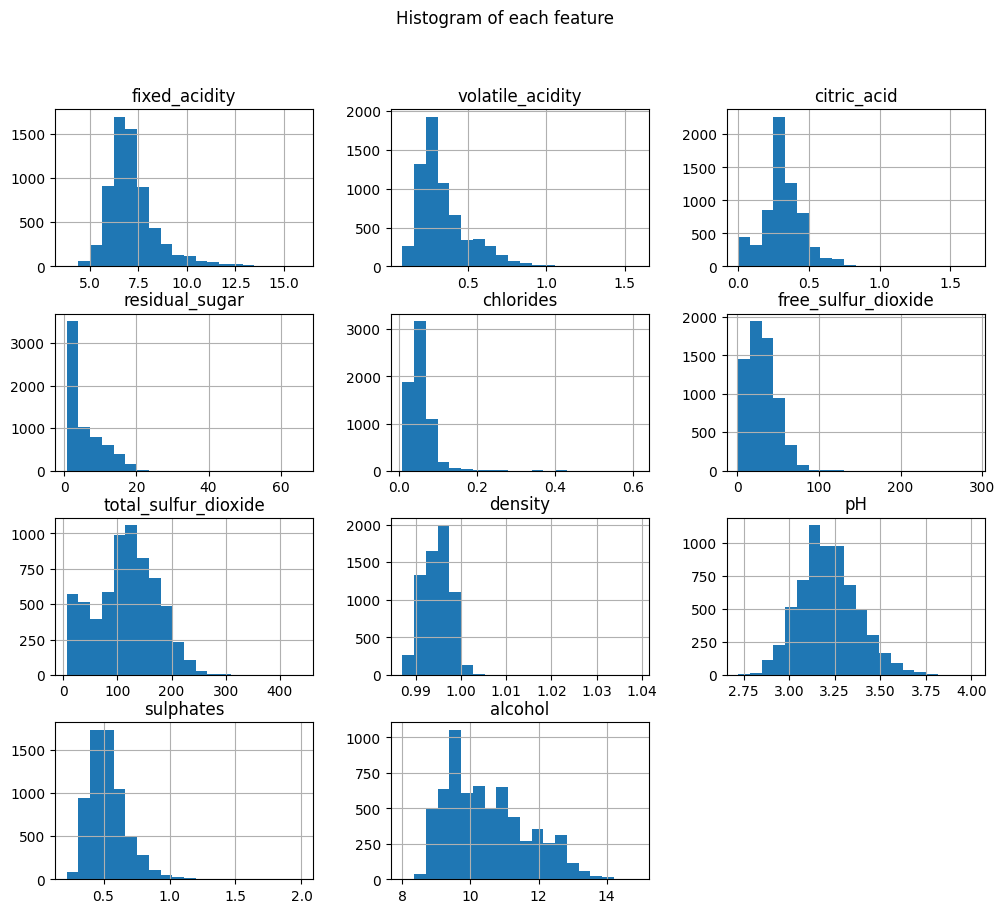

In [5]:
# histogram of each feature
X.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of each feature')
plt.show()


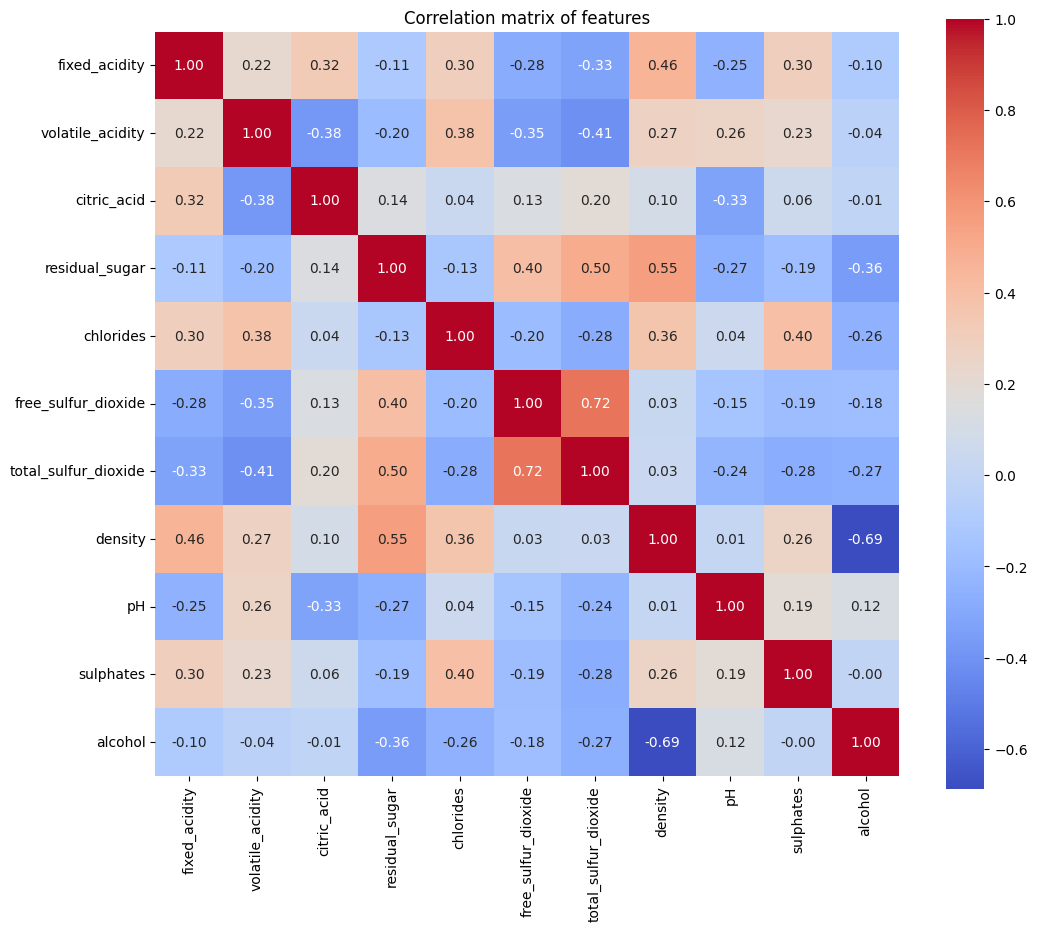

In [6]:
# correlation matrix with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of features')
plt.show()



## Train Decision Tree Model

In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

## Evaluate the Model

Accuracy: 0.5353846153846153
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.55      0.62      0.59       402
           6       0.53      0.69      0.60       597
           7       0.49      0.16      0.24       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.22      0.21      0.20      1300
weighted avg       0.49      0.54      0.50      1300



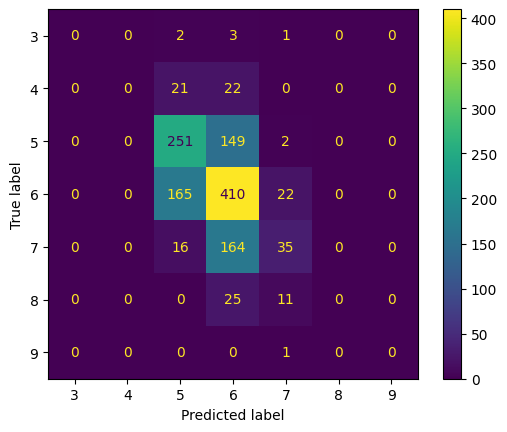

In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred))
label = np.unique(y)
print(classification_report(y_test, y_pred, labels=label, zero_division=0))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()

## Try different depth

Accuracy: 0.5538461538461539
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.13      0.05      0.07        43
           5       0.57      0.64      0.60       402
           6       0.59      0.58      0.59       597
           7       0.48      0.50      0.49       215
           8       0.47      0.19      0.27        36
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1300
   macro avg       0.32      0.28      0.29      1300
weighted avg       0.54      0.55      0.55      1300



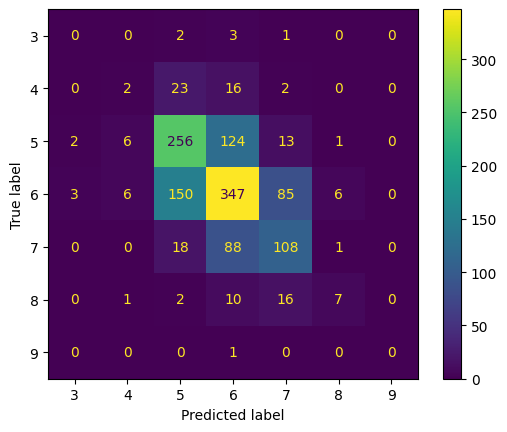

In [16]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
label = np.unique(y)
print(classification_report(y_test, y_pred, labels=label, zero_division=0))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()

Accuracy: 0.5984615384615385
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.24      0.23      0.24        43
           5       0.60      0.68      0.64       402
           6       0.66      0.59      0.62       597
           7       0.56      0.60      0.58       215
           8       0.47      0.39      0.42        36
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.36      0.36      0.36      1300
weighted avg       0.60      0.60      0.60      1300



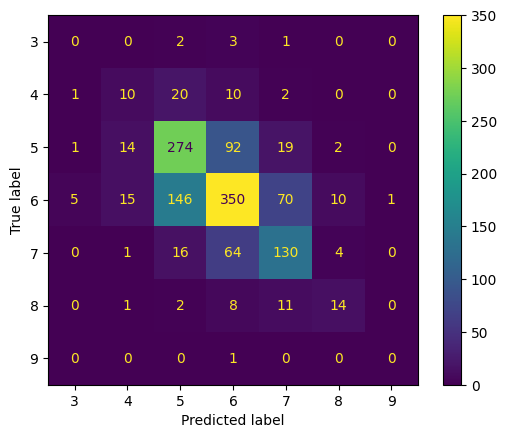

In [15]:
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
label = np.unique(y)
print(classification_report(y_test, y_pred, labels=label, zero_division=0))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()

Accuracy: 0.5969230769230769
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.60      0.68      0.64       402
           6       0.66      0.59      0.63       597
           7       0.54      0.58      0.56       215
           8       0.40      0.39      0.39        36
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.35      0.35      0.35      1300
weighted avg       0.60      0.60      0.60      1300



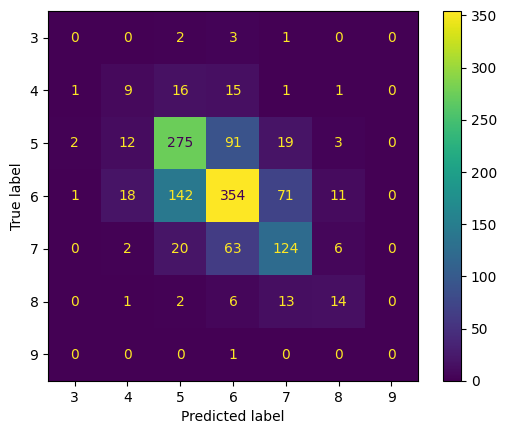

In [17]:
dt = DecisionTreeClassifier(max_depth=50, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
label = np.unique(y)
print(classification_report(y_test, y_pred, labels=label, zero_division=0))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()

## Analysis and Discussion
By testing out differnt max_depth parameters, I found out that higher depth would be more likely to caption some of the outliers. As shown in the outputs, max_depth of 4 wasn't able to correctly predict class 4 at all, but when the depth goes higher, the accuracy increased from 0% to 7% then to 24%. However, that does not mean the higher the better, just like other algorithms, there still exsit a limit. For example, the isn't that much of differece between max_depth of 20 and 50. 